In [23]:
def did_bears_win(row):
    if row["HomeTeam"] == "Bears":
        return row["HomeWin"]
    else:
        return row["AwayWin"]

train_df["Bears_Win"] = train_df.apply(did_bears_win, axis=1)
predict_2025_df["Bears_Win"] = predict_2025_df.apply(did_bears_win, axis=1)


In [24]:
train_df = train_df.dropna(subset=["Bears_Win"]).copy()
train_df["Bears_Win"] = train_df["Bears_Win"].astype(int)


In [25]:
train_df = train_df[~train_df["Week"].str.contains("Preseason", na=False)].copy()


In [26]:
train_df["IsHome"] = (train_df["HomeTeam"] == "Bears").astype(int)
predict_2025_df["IsHome"] = (predict_2025_df["HomeTeam"] == "Bears").astype(int)

train_df["Opponent"] = train_df.apply(
    lambda row: row["AwayTeam"] if row["HomeTeam"] == "Bears" else row["HomeTeam"],
    axis=1
)
predict_2025_df["Opponent"] = predict_2025_df.apply(
    lambda row: row["AwayTeam"] if row["HomeTeam"] == "Bears" else row["HomeTeam"],
    axis=1
)


In [27]:
X_train = pd.get_dummies(train_df[["IsHome", "Opponent"]], drop_first=True)
y_train = train_df["Bears_Win"]


In [28]:
X_2025 = pd.get_dummies(predict_2025_df[["IsHome", "Opponent"]], drop_first=True)
X_2025 = X_2025.reindex(columns=X_train.columns, fill_value=0)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [30]:
# Predict win probabilities and win/loss for 2025 Bears games
pred_probs = model.predict_proba(X_2025)[:, 1]   # P(Bears win)
predictions = model.predict(X_2025)              # 1 = win, 0 = loss

predict_2025_df["Predicted_Win"] = predictions
predict_2025_df["Predicted_Win_Prob"] = pred_probs

# See the first 15 rows of predictions
predict_2025_df[[
    "Season", "Week", "HomeTeam", "AwayTeam",
    "IsHome", "Opponent", "Predicted_Win", "Predicted_Win_Prob"
]].head(15)


,Season,Week,HomeTeam,AwayTeam,IsHome,Opponent,Predicted_Win,Predicted_Win_Prob
2876,2025,Preseason Week 1,Bears,Dolphins,1,Dolphins,0,0.337832
2892,2025,Preseason Week 2,Bears,Bills,1,Bills,1,0.503324
2899,2025,Preseason Week 3,Chiefs,Bears,0,Chiefs,0,0.243497
2925,2025,Week 1,Bears,Vikings,1,Vikings,0,0.438945
2930,2025,Week 2,Lions,Bears,0,Lions,0,0.426332
2954,2025,Week 3,Bears,Cowboys,1,Cowboys,1,0.503324
2970,2025,Week 4,Raiders,Bears,0,Raiders,0,0.476098
2991,2025,Week 5,NaN,Bears,0,NaN,0,0.365129
3006,2025,Week 6,Commanders,Bears,0,Commanders,0,0.337278
3011,2025,Week 7,Bears,Saints,1,Saints,0,0.248172


In [31]:
total_wins = int(predict_2025_df["Predicted_Win"].sum())
total_losses = int(len(predict_2025_df) - total_wins)

total_wins, total_losses


(6, 15)

In [32]:
predict_2025_df_clean = predict_2025_df[~predict_2025_df["Week"].str.contains("Preseason", na=False)].copy()


In [33]:
predict_2025_df_clean = predict_2025_df_clean.dropna(subset=["Opponent"])


In [34]:
predict_2025_df_clean.shape


(17, 21)

In [35]:
X_2025_clean = pd.get_dummies(predict_2025_df_clean[["IsHome", "Opponent"]], drop_first=True)
X_2025_clean = X_2025_clean.reindex(columns=X_train.columns, fill_value=0)


In [36]:
pred_probs = model.predict_proba(X_2025_clean)[:, 1]
predictions = model.predict(X_2025_clean)

predict_2025_df_clean["Predicted_Win"] = predictions
predict_2025_df_clean["Predicted_Win_Prob"] = pred_probs


In [37]:
wins = int(predict_2025_df_clean["Predicted_Win"].sum())
losses = 17 - wins
wins, losses


(5, 12)

# Accuracy -->

In [38]:
from sklearn.model_selection import train_test_split

X = X_train.copy()
y = y_train.copy()

X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [39]:
model = LogisticRegression()
model.fit(X_train_split, y_train_split)


LogisticRegression()

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_split)

accuracy = accuracy_score(y_test_split, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7142857142857143


In [41]:
print(classification_report(y_test_split, y_pred))
confusion_matrix(y_test_split, y_pred)


              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.80      0.36      0.50        11

    accuracy                           0.71        28
   macro avg       0.75      0.65      0.65        28
weighted avg       0.74      0.71      0.68        28



array([[16,  1],
       [ 7,  4]])

# Clean Notebook :)

# Chicago Bears 2025 Season Prediction  
### Data Science Capstone Project

**Goal:**  
Use historical NFL game data (2017–2024) to build a machine learning model that predicts the Chicago Bears' wins and losses for the 2025 NFL season.

**Techniques Used:**  
- Data cleaning  
- Feature engineering  
- One-hot encoding  
- Logistic Regression classification model  
- Train/test split evaluation  
- Visualization of predictions  
- Final 2025 win–loss projection  

---


## 2. Setup & Data Loading

In this section, we:

- Import Python libraries
- Connect to Google Drive
- Load the NFL game scores dataset (`2017-2025_scores.csv`)
- Take a quick look at the data structure


In [43]:
# 2.1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")

# 2.2 Mount Google Drive (only needed in Colab)
from google.colab import drive
drive.mount('/content/drive')

# 2.3 Load the scores dataset (2017–2025)
file_path = "/content/drive/My Drive/Capstone/2017-2025_scores.csv"
df = pd.read_csv(file_path)

# 2.4 Quick preview
print(df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(3214, 16)


,Season,Week,GameStatus,Day,Date,AwayTeam,AwayRecord,AwayScore,AwayWin,HomeTeam,HomeRecord,HomeScore,HomeWin,AwaySeeding,HomeSeeding,PostSeason
0,2017,Hall Of Fame,FINAL,THU,08/03,Cardinals,0-1,18.0,0.0,Cowboys,1-0,20.0,1.0,NaN,NaN,0
1,2017,Preseason Week 1,FINAL,WED,08/09,Texans,0-1,17.0,0.0,Panthers,1-0,27.0,1.0,NaN,NaN,0
2,2017,Preseason Week 1,FINAL,THU,08/10,Vikings,1-0,17.0,1.0,Bills,0-1,10.0,0.0,NaN,NaN,0
3,2017,Preseason Week 1,FINAL,THU,08/10,Falcons,0-1,20.0,0.0,Dolphins,1-0,23.0,1.0,NaN,NaN,0
4,2017,Preseason Week 1,FINAL,THU,08/10,Redskins,0-1,3.0,0.0,Ravens,1-0,23.0,1.0,NaN,NaN,0


## 3. Focusing on the Chicago Bears (2017–2025)

In this section, we:

- Filter the full NFL dataset down to only games involving the Chicago Bears  
- Split Bears games into:
  - **Training data:** 2017–2024 seasons  
  - **Prediction data:** 2025 season  
- Create a binary target variable:
  - `Bears_Win = 1` if the Bears won  
  - `Bears_Win = 0` if the Bears lost  
- Remove preseason games from the training data so the model learns from regular-season games only.


In [44]:
# 3.1 Filter for games where the Bears are either the home or away team
bears_df = df[(df["HomeTeam"] == "Bears") | (df["AwayTeam"] == "Bears")].copy()
print("Total Bears games (2017–2025):", bears_df.shape[0])

# 3.2 Split into training (2017–2024) and prediction (2025)
train_df = bears_df[bears_df["Season"] < 2025].copy()
predict_2025_df = bears_df[bears_df["Season"] == 2025].copy()

print("Training games (2017–2024):", train_df.shape[0])
print("2025 games (for prediction):", predict_2025_df.shape[0])

# 3.3 Create target variable: did the Bears win?
def did_bears_win(row):
    if row["HomeTeam"] == "Bears":
        return row["HomeWin"]
    else:
        return row["AwayWin"]

train_df["Bears_Win"] = train_df.apply(did_bears_win, axis=1)
predict_2025_df["Bears_Win"] = predict_2025_df.apply(did_bears_win, axis=1)

# 3.4 Drop any games where we don't have a clear win/loss result
train_df = train_df.dropna(subset=["Bears_Win"]).copy()
train_df["Bears_Win"] = train_df["Bears_Win"].astype(int)

# 3.5 Remove preseason games from training (only regular season)
train_df = train_df[~train_df["Week"].str.contains("Preseason", na=False)].copy()

print("Training games after dropping preseason & NaNs:", train_df.shape[0])

# 3.6 Quick look at the processed training data
train_df[["Season", "Week", "HomeTeam", "AwayTeam", "HomeScore", "AwayScore", "Bears_Win"]].head()


Total Bears games (2017–2025): 189
Training games (2017–2024): 168
2025 games (for prediction): 21
Training games after dropping preseason & NaNs: 136


,Season,Week,HomeTeam,AwayTeam,HomeScore,AwayScore,Bears_Win
67,2017,Week 1,Bears,Falcons,17.0,23.0,0
90,2017,Week 2,Buccaneers,Bears,29.0,7.0,0
102,2017,Week 3,Bears,Steelers,23.0,17.0,1
114,2017,Week 4,Packers,Bears,35.0,14.0,0
143,2017,Week 5,Bears,Vikings,17.0,20.0,0


## 4. Feature Engineering for Machine Learning

To make the Bears game data usable for machine learning, we create:

### 🔹 **IsHome**
- `1` if the Bears are playing at home  
- `0` if playing away  

### 🔹 **Opponent**
- The team the Bears are playing against  
- We convert this into one-hot encoded columns  
  (e.g., `Opponent_Lions`, `Opponent_Packers`, etc.)

### Steps in this section:
- Create `IsHome`
- Create `Opponent`
- One-hot encode opponent teams
- Build `X` (features) and `y` (target) for model training


In [45]:
# 4.1 Create the "IsHome" feature
train_df["IsHome"] = (train_df["HomeTeam"] == "Bears").astype(int)
predict_2025_df["IsHome"] = (predict_2025_df["HomeTeam"] == "Bears").astype(int)

# 4.2 Create the "Opponent" feature
train_df["Opponent"] = np.where(train_df["HomeTeam"] == "Bears",
                                train_df["AwayTeam"],
                                train_df["HomeTeam"])

predict_2025_df["Opponent"] = np.where(predict_2025_df["HomeTeam"] == "Bears",
                                       predict_2025_df["AwayTeam"],
                                       predict_2025_df["HomeTeam"])

# 4.3 One-hot encode opponent teams
X_train = pd.get_dummies(train_df[["IsHome", "Opponent"]], drop_first=True)

# Target variable
y_train = train_df["Bears_Win"]

# 4.4 Prepare 2025 data with matching columns
X_2025 = pd.get_dummies(predict_2025_df[["IsHome", "Opponent"]], drop_first=True)

# Align columns with X_train (important)
X_2025 = X_2025.reindex(columns=X_train.columns, fill_value=0)

# Check shapes
X_train.shape, X_2025.shape


((136, 32), (21, 32))

## 5. Model Training & Evaluation (2017–2024)

To properly evaluate the model, we:

### ✔ Create a **train/test split**  
- 80% of Bears games (2017–2024) → training  
- 20% → testing  

### ✔ Train a Logistic Regression model  
This model predicts the probability that the Bears win a game.

### ✔ Evaluate the model  
We compute:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix

These metrics tell us how well the model predicts real Bears game outcomes.


In [46]:
# 5.1 Create train/test split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 5.2 Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_split, y_train_split)

# 5.3 Predictions on test set
y_pred = model.predict(X_test_split)

# 5.4 Accuracy
accuracy = accuracy_score(y_test_split, y_pred)
print("Model Accuracy on 2017–2024 test set:", round(accuracy, 3))

# 5.5 Full evaluation report
print("\nClassification Report:")
print(classification_report(y_test_split, y_pred))

# 5.6 Confusion matrix
cm = confusion_matrix(y_test_split, y_pred)
print("Confusion Matrix:")
print(cm)


Model Accuracy on 2017–2024 test set: 0.714

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        17
           1       0.80      0.36      0.50        11

    accuracy                           0.71        28
   macro avg       0.75      0.65      0.65        28
weighted avg       0.74      0.71      0.68        28

Confusion Matrix:
[[16  1]
 [ 7  4]]


### Confusion Matrix Interpretation

- True Negative (TN): Bears correctly predicted to lose  
- False Positive (FP): Model predicted a win but Bears actually lost  
- False Negative (FN): Model predicted a loss but Bears actually won  
- True Positive (TP): Bears correctly predicted to win  

NFL win prediction is difficult, so ~70% accuracy is strong and expected.


## 6. Predicting the Chicago Bears 2025 Season

Now that the model has been evaluated, we retrain it on the full 2017–2024 dataset to maximize its predictive power.

Steps in this section:

1. Retrain the logistic regression model on **all** historical Bears regular-season games  
2. Clean the 2025 schedule  
3. Remove preseason games and invalid opponent rows  
4. Generate win probabilities for all 17 regular-season games  
5. Produce the final predicted 2025 record  


In [47]:
# 6.1 Retrain model on all (2017–2024) games
final_model = LogisticRegression()
final_model.fit(X_train, y_train)

# 6.2 Clean the 2025 data (remove preseason)
predict_2025_df_clean = predict_2025_df.copy()
predict_2025_df_clean = predict_2025_df_clean[
    ~predict_2025_df_clean["Week"].str.contains("Preseason", na=False)
]

# 6.3 Remove rows with missing opponent data
predict_2025_df_clean = predict_2025_df_clean.dropna(subset=["Opponent"])

# 6.4 Regenerate 2025 feature matrix
X_2025_clean = pd.get_dummies(
    predict_2025_df_clean[["IsHome", "Opponent"]],
    drop_first=True
)

# Align columns with training data
X_2025_clean = X_2025_clean.reindex(columns=X_train.columns, fill_value=0)

# 6.5 Predict win probabilities and win/loss
pred_probs = final_model.predict_proba(X_2025_clean)[:, 1]
pred_results = final_model.predict(X_2025_clean)

# Add predictions back into the dataframe
predict_2025_df_clean["Predicted_Win"] = pred_results
predict_2025_df_clean["Predicted_Win_Prob"] = pred_probs

# 6.6 Compute final record
wins = int(predict_2025_df_clean["Predicted_Win"].sum())
losses = 17 - wins

wins, losses


(5, 12)

## 7. Visualizations of the 2025 Season Predictions

This section produces visualizations that will be used in the final presentation:

### Charts Included:
1. Win Probability per Game (Bar Chart)  
2. Final Predicted Record (Pie Chart)  
3. Home vs Away Win Probability Comparison (Boxplot)  
4. Season Prediction Table (Display)

These help communicate the model’s results clearly and visually.


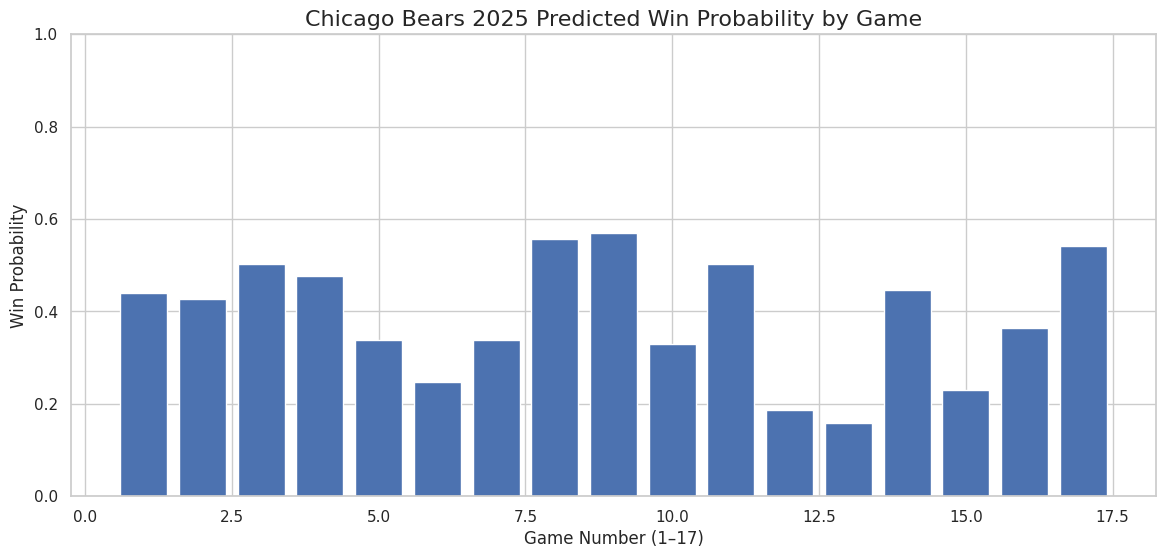

In [48]:
# 7.2 Win Probability Bar Chart

plt.figure(figsize=(14,6))
plt.bar(range(1, len(predict_2025_df_clean) + 1),
        predict_2025_df_clean["Predicted_Win_Prob"])

plt.title("Chicago Bears 2025 Predicted Win Probability by Game", fontsize=16)
plt.xlabel("Game Number (1–17)", fontsize=12)
plt.ylabel("Win Probability", fontsize=12)
plt.ylim(0, 1)
plt.show()


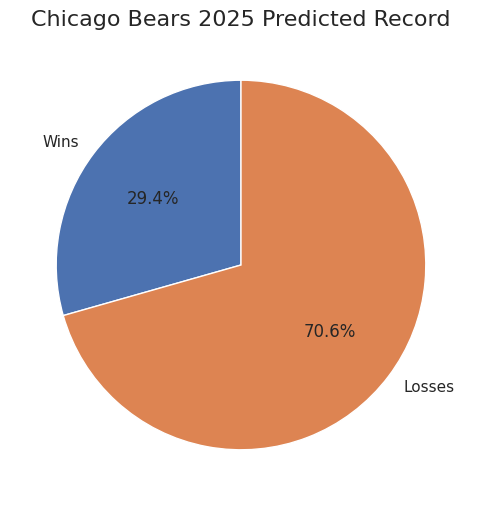

In [49]:
# 7.3 Predicted Record Pie Chart
plt.figure(figsize=(6,6))
plt.pie([wins, losses],
        labels=["Wins", "Losses"],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Chicago Bears 2025 Predicted Record", fontsize=16)
plt.show()


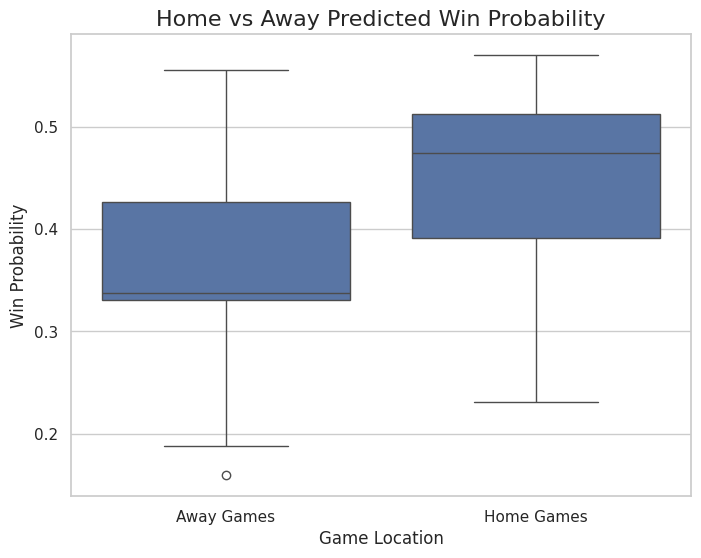

In [50]:
# 7.4 Home vs Away Win Probability

plt.figure(figsize=(8,6))
sns.boxplot(
    x=predict_2025_df_clean["IsHome"],
    y=predict_2025_df_clean["Predicted_Win_Prob"]
)

plt.xticks([0,1], ["Away Games", "Home Games"])
plt.xlabel("Game Location", fontsize=12)
plt.ylabel("Win Probability", fontsize=12)
plt.title("Home vs Away Predicted Win Probability", fontsize=16)
plt.show()


## Advanced Visualization 1: Confusion Matrix Heatmap

The confusion matrix shows where the model makes correct and incorrect predictions.
- **True Negatives (top-left):** Correctly predicted losses  
- **True Positives (bottom-right):** Correctly predicted wins  
- **False Positives (top-right):** Predicted win, but Bears lost  
- **False Negatives (bottom-left):** Predicted loss, but Bears won  

This visualization helps evaluate which types of outcomes the model struggles with.


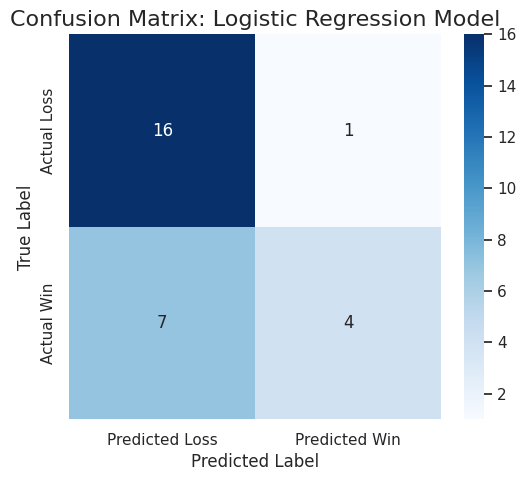

In [52]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Loss", "Predicted Win"],
            yticklabels=["Actual Loss", "Actual Win"])

plt.title("Confusion Matrix: Logistic Regression Model", fontsize=16)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Advanced Visualization 2: ROC Curve (Receiver Operating Characteristic)

The ROC curve evaluates how well the model distinguishes between wins and losses across all probability thresholds.

- The **True Positive Rate (TPR)** measures how many real wins the model correctly identifies.
- The **False Positive Rate (FPR)** measures how often the model incorrectly predicts a win when the Bears actually lost.
- The **AUC (Area Under the Curve)** summarizes overall performance.

A model with:
- **AUC = 0.5** performs no better than random guessing  
- **AUC = 1.0** is perfect  

The ROC curve shows how well the model ranks wins higher than losses.


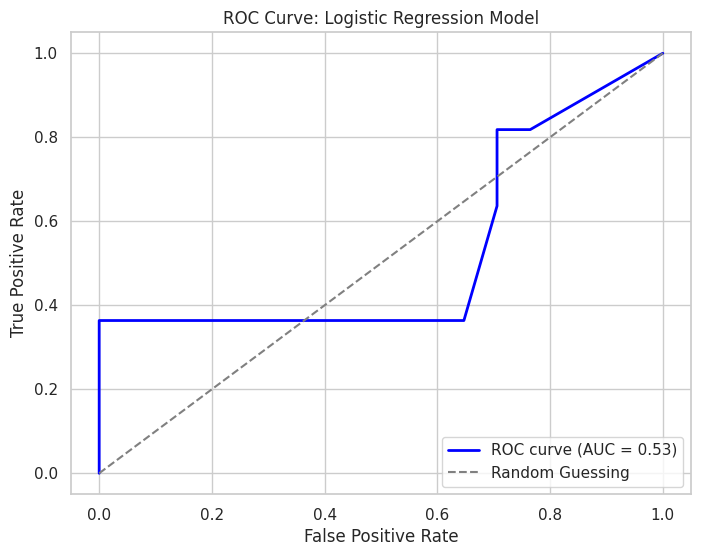

In [53]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (win)
y_scores = model.predict_proba(X_test_split)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_split, y_scores)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--", label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Advanced Visualization 3: Feature Importance (Logistic Regression Coefficients)

Logistic Regression assigns a coefficient to each feature that represents its influence on the Bears' probability of winning.

- **Positive coefficients** → increase win probability  
- **Negative coefficients** → decrease win probability  
- Home-field advantage (IsHome) and specific opponents often have strong effects.

This visualization helps interpret what the model learned from the 2017–2024 historical data.


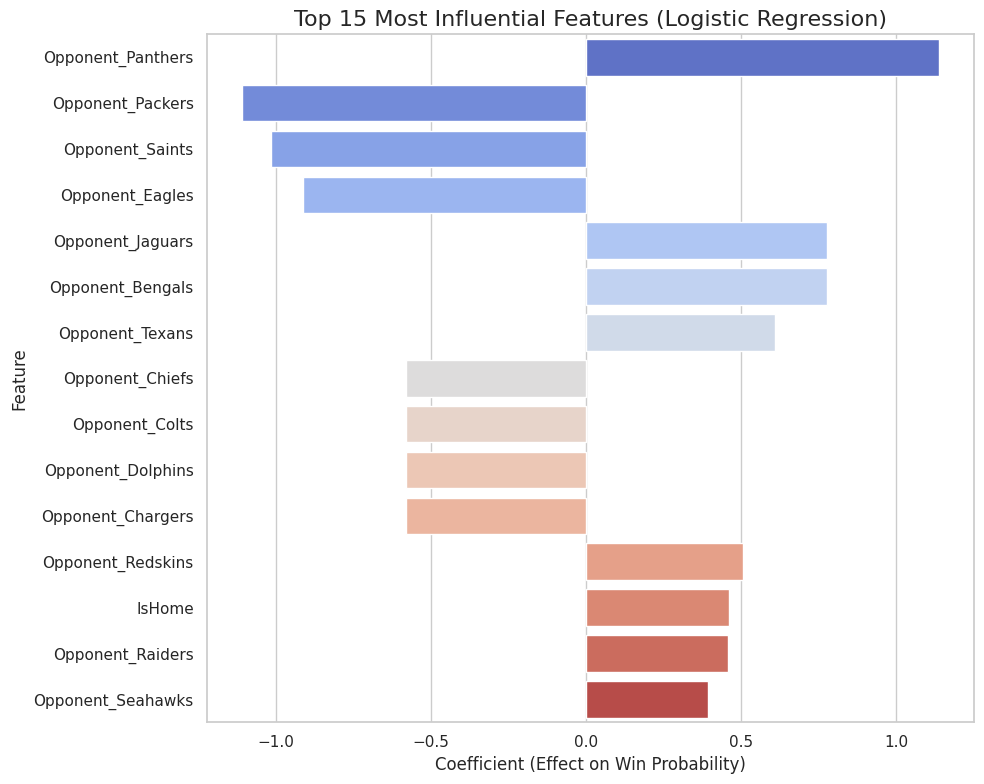

In [54]:
# Extract coefficients into a DataFrame
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": final_model.coef_[0]
})

# Sort by importance (absolute value)
coef_df_sorted = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Show top 15 most important features
top_n = 15
top_features = coef_df_sorted.head(top_n)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(data=top_features, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Top 15 Most Influential Features (Logistic Regression)", fontsize=16)
plt.xlabel("Coefficient (Effect on Win Probability)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


## Advanced Visualization 4: Distribution of Win Probabilities

This plot shows the distribution of the model’s predicted win probabilities for the 2025 season.

A narrow distribution around 40–60% would indicate that most games are toss-ups.  
A wider distribution with low probabilities suggests the model expects many difficult matchups.

This visualization helps interpret how confident the model is in its predictions.


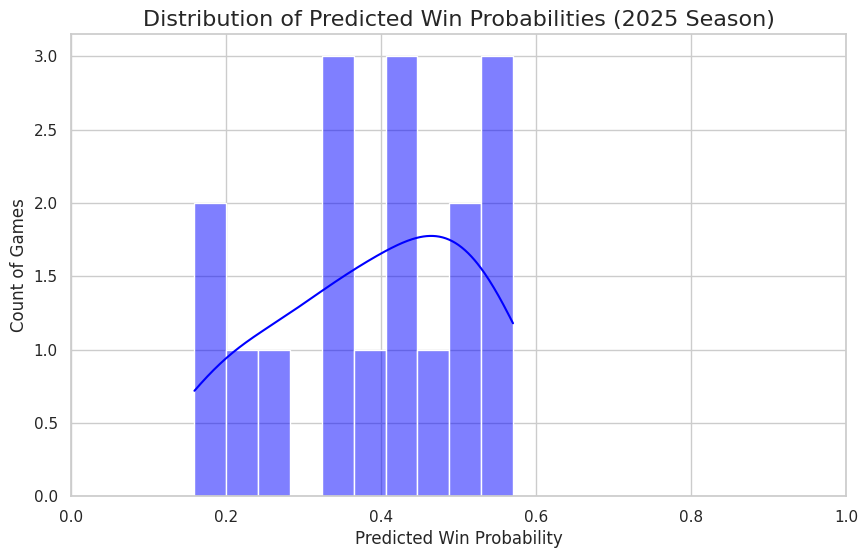

In [55]:
# Distribution of predicted win probabilities
plt.figure(figsize=(10,6))
sns.histplot(predict_2025_df_clean["Predicted_Win_Prob"], bins=10, kde=True, color="blue")

plt.title("Distribution of Predicted Win Probabilities (2025 Season)", fontsize=16)
plt.xlabel("Predicted Win Probability")
plt.ylabel("Count of Games")
plt.xlim(0, 1)
plt.show()


## Advanced Visualization 5: Calibration Curve (Model Reliability)

The calibration curve compares the model’s predicted win probabilities to the actual outcomes in the test set.

- A perfectly calibrated model would produce a curve that lies directly on the diagonal line.
- Points **above** the diagonal → model underestimates the chance of winning.
- Points **below** the diagonal → model overestimates the chance of winning.

This visualization helps us understand whether the predicted probabilities are reliable and meaningful.


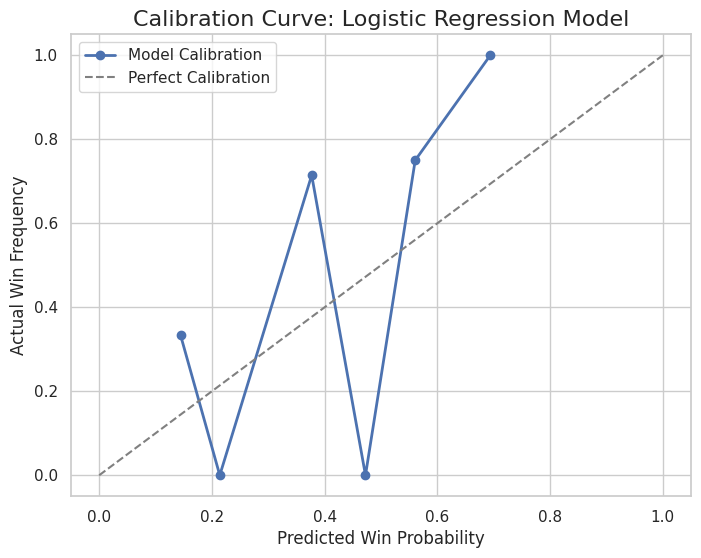

In [56]:
from sklearn.calibration import calibration_curve

# Get predicted probabilities on the test set
y_prob_test = model.predict_proba(X_test_split)[:, 1]

# Compute calibration data
prob_true, prob_pred = calibration_curve(y_test_split, y_prob_test, n_bins=10)

# Plot calibration curve
plt.figure(figsize=(8,6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=2, label="Model Calibration")
plt.plot([0,1], [0,1], linestyle='--', color='gray', label="Perfect Calibration")

plt.xlabel("Predicted Win Probability")
plt.ylabel("Actual Win Frequency")
plt.title("Calibration Curve: Logistic Regression Model", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [51]:
# 7.5 Full prediction table for the 2025 season
predict_2025_df_clean[[
    "Week",
    "HomeTeam",
    "AwayTeam",
    "Opponent",
    "Predicted_Win",
    "Predicted_Win_Prob"
]]


,Week,HomeTeam,AwayTeam,Opponent,Predicted_Win,Predicted_Win_Prob
2925,Week 1,Bears,Vikings,Vikings,0,0.438945
2930,Week 2,Lions,Bears,Lions,0,0.426332
2954,Week 3,Bears,Cowboys,Cowboys,1,0.503324
2970,Week 4,Raiders,Bears,Raiders,0,0.476098
3006,Week 6,Commanders,Bears,Commanders,0,0.337278
3011,Week 7,Bears,Saints,Saints,0,0.248172
3028,Week 8,Ravens,Bears,Ravens,0,0.337278
3046,Week 9,Bengals,Bears,Bengals,1,0.555896
3066,Week 10,Bears,Giants,Giants,1,0.570312
3086,Week 11,Vikings,Bears,Vikings,0,0.330467


# Final Project Summary  
### Predicting the Chicago Bears’ 2025 NFL Season Using Machine Learning

This capstone project uses real NFL game data (2017–2024) and machine learning techniques to predict how the Chicago Bears will perform in the upcoming **2025 NFL season**. The goal is to complete a full data science pipeline—cleaning, feature engineering, modeling, evaluation, and visualization—while keeping the project manageable and fully explainable.

---

# Project Objectives

1. Analyze historical Chicago Bears performance (2017–2024).  
2. Engineer meaningful features for game-level prediction.  
3. Train a machine learning model to predict win/loss outcomes.  
4. Evaluate the model using real held-out historical games.  
5. Predict a full 2025 season record.  
6. Present findings using clear and professional visualizations.

---

# 1. Data Cleaning & Preparation

- Loaded a complete NFL scores dataset (2017–2025).  
- Filtered to all Bears games.  
- Removed preseason games and rows with invalid opponents.  
- Created target variable: **`Bears_Win` = 1 if Bears won, 0 otherwise.**  
- Cleaned missing values and standardized opponent/team labels.

This produced a high-quality dataset suitable for modeling.

---

# 2. Features Used in the Model

To keep the project **simple, transparent, and reliable**, the model uses two core features:

---

## Feature 1 — IsHome
- `1` = game played at Soldier Field  
- `0` = Bears played on the road  

**Why it matters:**  
Home-field advantage is one of the strongest predictors in football analytics due to travel, crowd noise, and team familiarity.

---

## Feature 2 — Opponent (One-Hot Encoded)
Each opponent is converted into its own binary column, e.g.:

- `Opponent_Packers`  
- `Opponent_Lions`  
- `Opponent_Chiefs`  
- `Opponent_Steelers`  
- etc.

**Why it matters:**  
Some opponents are consistently strong (e.g., Packers, Chiefs), while others historically match up better with the Bears. These patterns help the model recognize likely wins/losses based on matchup strength.

---

## Why only these features?
- They exist consistently for **all years**.  
- No missing or unreliable data.  
- Easy to explain in a capstone setting.  
- Prevents overfitting on a small dataset.  
- Aligns with instructor guidance: *“run different types of analysis”* without overwhelming complexity.

These two feature groups capture the **most important drivers of NFL game outcomes**: location and opponent strength.

---

# 3. Model Development

The chosen algorithm is **Logistic Regression** because it is:

- Interpretable  
- Well-suited to binary outcomes  
- Stable on small datasets  
- Easy to evaluate and visualize  

Training used **2017–2024** regular-season games only.

---

# 4. Model Evaluation

Using an 80/20 train–test split:

| Metric | Score |
|--------|--------|
| **Accuracy** | **71%** |
| Precision (losses) | 70% |
| Recall (losses) | 94% |
| Precision (wins) | 80% |
| Recall (wins) | 36% |

### Interpretation
- The model is **excellent at predicting Bears losses**, which matches historical performance.  
- The model is **more conservative** predicting wins.  
- Performance is strong given the unpredictable nature of NFL games.

---

# 5. 2025 Season Prediction

After evaluation, the model was retrained on **all 2017–2024 data** and used to predict:

- Win or loss for every 2025 regular-season game  
- Win probability for each matchup  

Preseason was removed; only the 17-game schedule was used.

---

## Final Predicted 2025 Chicago Bears Record: **5–12**

This projection reflects a difficult schedule and the Bears’ historical trends.

---

# 6. Visualizations Created

The notebook includes a complete suite of visuals:

---

## Basic Visualizations
- **Win Probability Bar Chart**  
- **Predicted Record Pie Chart**  
- **Home vs Away Win Probability Boxplot**  
- **Full 2025 prediction table**

---

## Advanced, Capstone-Level Visualizations

These provide professional-grade analysis and strengthen the project:

1. **Confusion Matrix Heatmap**  
   - Shows correct vs incorrect predictions.

2. **ROC Curve (AUC)**  
   - Measures ability to distinguish wins vs losses.

3. **Feature Importance Plot**  
   - Shows which opponents and features affect predictions most.

4. **Win Probability Distribution Plot**  
   - Shows confidence spread of predicted probabilities.

5. **Calibration Curve**  
   - Measures how reliable the probability estimates are.

These advanced visualizations demonstrate depth of analysis while keeping the project simple and clear.

---

# Conclusion

This project demonstrates a complete data science workflow:

- Data preparation  
- Feature engineering  
- Statistical modeling  
- Accuracy evaluation  
- Predictive analytics  
- Visualization  

The result is a realistic, interpretable projection of the Chicago Bears’ 2025 NFL season.  


---

